Importacion de datos y medidas de las variables de los datos

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv",keep_default_na=False)
data.describe(include='all')
data['Sleep Disorder']

0             None
1             None
2             None
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object

Codificacion de variables cualitativas

In [38]:
gender={
    'Male':0,
    'Female':1
}
occupation_encoding = {
    'Accountant': 1,
    'Doctor': 2,
    'Engineer': 3,
    'Lawyer': 4,
    'Manager': 5,
    'Nurse': 6,
    'Manager': 7,
    'Salesperson': 8,
    'Sales Representative': 9,
    'Scientist': 10,
    'Teacher': 11
}
bmi_category_encoding = {
    'Normal': 0,
    'Normal Weight':0,
    'Overweight': 1,
    'Obese': 2
}
sleep_disorder_encoding = {
    'None': 0,
    'Insomnia': 1,
    'Sleep Apnea': 2
}
data['Sleep Disorder'] = data['Sleep Disorder'].map(sleep_disorder_encoding)
data['Occupation'] = data['Occupation'].map(occupation_encoding)
data['BMI Category'] = data['BMI Category'].map(bmi_category_encoding)
data['Gender']=data["Gender"].map(gender)
data["Sleep Disorder"]


0      0
1      0
2      0
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int64

Correlación

In [39]:
data.corr(numeric_only=True)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
Person ID,1.000000,0.584229,0.990516,0.289746,0.296305,0.431612,0.149882,-0.394287,0.442905,-0.225467,0.043844,0.476492
Gender,0.584229,1.000000,0.596358,0.241890,0.121579,0.291366,-0.001454,-0.396018,0.242743,-0.217105,0.014509,0.362591
Age,0.990516,0.596358,1.000000,0.249637,0.344709,0.473734,0.178993,-0.422344,0.427704,-0.225606,0.057973,0.487832
Occupation,0.289746,0.241890,0.249637,1.000000,-0.331821,-0.287882,-0.103069,0.022923,0.639293,0.043007,-0.109174,0.482155
Sleep Duration,0.296305,0.121579,0.344709,-0.331821,1.000000,0.883213,0.212360,-0.811023,-0.349605,-0.516455,-0.039533,-0.239109
Quality of Sleep,0.431612,0.291366,0.473734,-0.287882,0.883213,1.000000,0.192896,-0.898752,-0.324413,-0.659865,0.016791,-0.213003
Physical Activity Level,0.149882,-0.001454,0.178993,-0.103069,0.212360,0.192896,1.000000,-0.034134,0.052076,0.136971,0.772723,0.236560
Stress Level,-0.394287,-0.396018,-0.422344,0.022923,-0.811023,-0.898752,-0.034134,1.000000,0.157649,0.670026,0.186829,0.151893
BMI Category,0.442905,0.242743,0.427704,0.639293,-0.349605,-0.324413,0.052076,0.157649,1.000000,0.469897,-0.142785,0.732479
Heart Rate,-0.225467,-0.217105,-0.225606,0.043007,-0.516455,-0.659865,0.136971,0.670026,0.469897,1.000000,-0.030309,0.384343


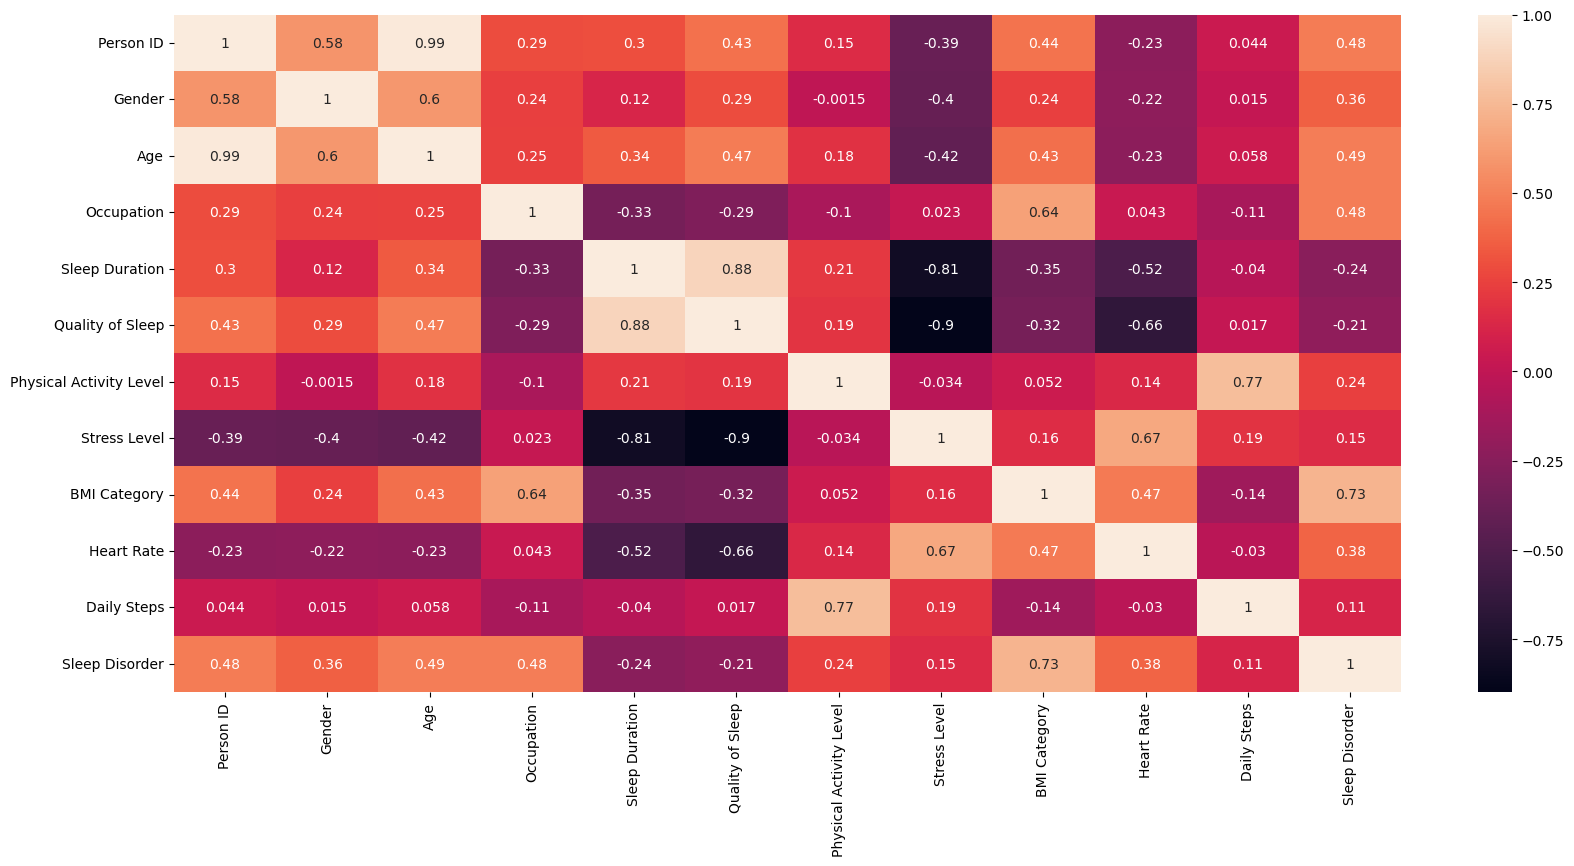

In [40]:
import seaborn as sns
sns.heatmap(data.corr(numeric_only=True), annot = True)
r = 1.1
plt.rcParams['figure.figsize'] = (r*18,r*8)  

plt.show()

Regresión Lineal múltiple

In [50]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Definir las variables predictoras y la variable dependiente
X = data[['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'BMI Category']]
y = data['Quality of Sleep']

# Añadir una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     718.2
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.81e-209
Time:                        00:12:58   Log-Likelihood:                -94.342
No. Observations:                 374   AIC:                             204.7
Df Residuals:                     366   BIC:                             236.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

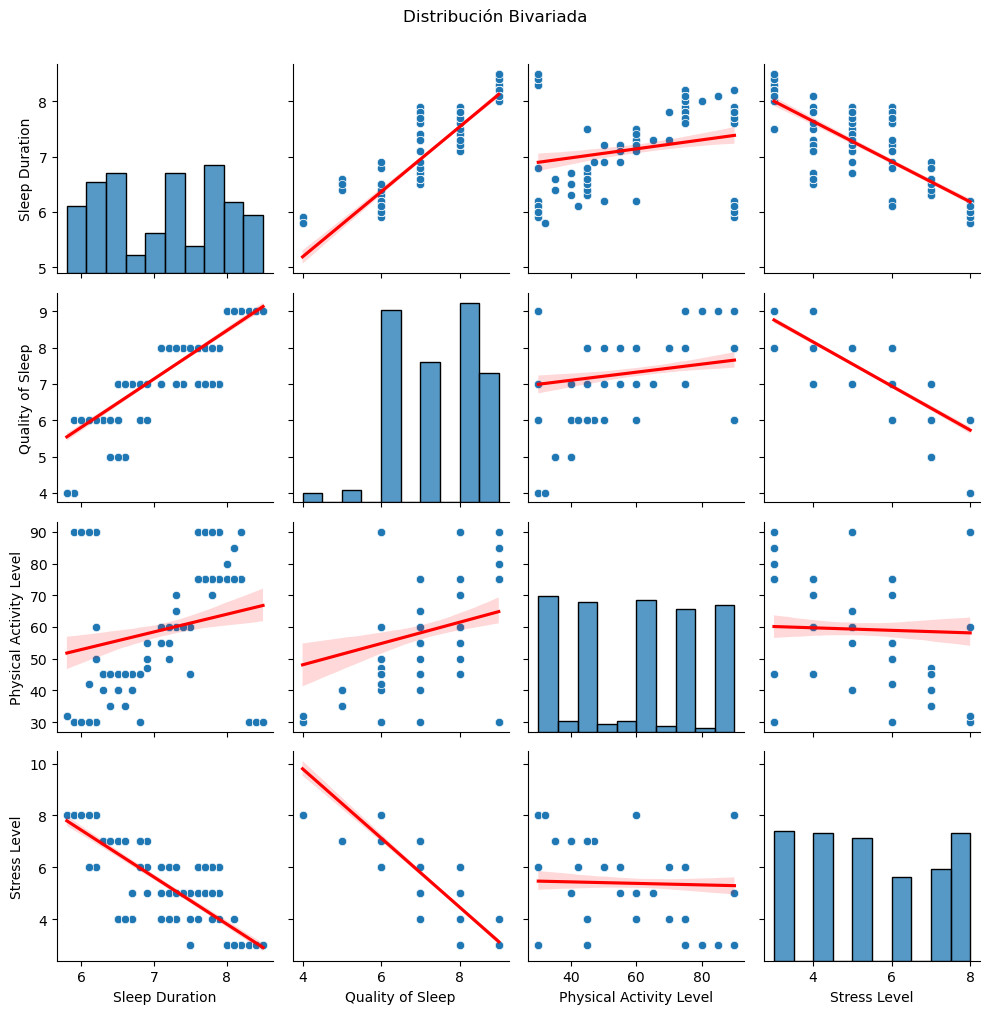

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Supongamos que 'data' es tu DataFrame
# data = pd.DataFrame(...)

# Crear el pairplot
pairplot = sns.pairplot(data, vars=['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level'])

# Agregar la línea de tendencia a cada gráfico bivariado
for i in range(len(pairplot.axes)):
    for j in range(len(pairplot.axes)):
        if i != j:  # Solo los gráficos bivariados
            # Obtener los datos para las variables x e y
            x_var = pairplot.x_vars[j]
            y_var = pairplot.y_vars[i]
            sns.regplot(x=x_var, y=y_var, data=data, scatter=False, ax=pairplot.axes[i, j], color='red')

plt.suptitle('Distribución Bivariada', y=1.01)
plt.tight_layout()
plt.show()


Regresion Lineal Simple

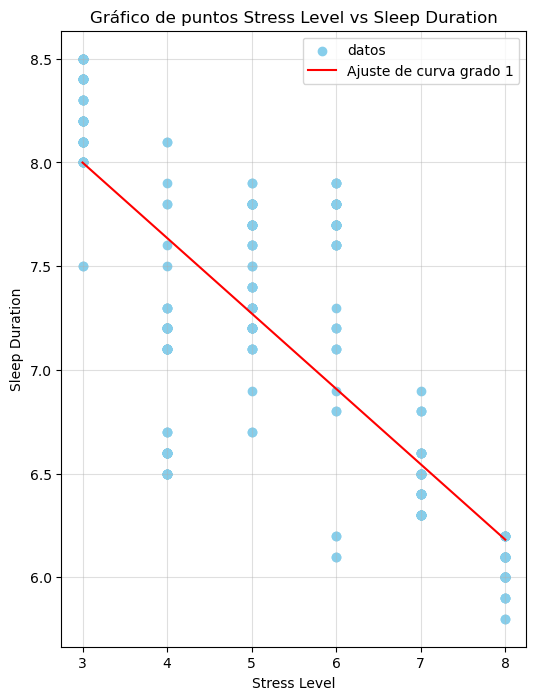

In [13]:
def Estimar_coeficientes(X,y, grado:int = 1): # X e Y son arreglos con los datos.
    X = np.column_stack([X**i for i in range(grado + 1)]) # Agregar una columna de 1's.
    coeficientes = np.linalg.inv(X.T @ X) @ X.T @ y  # Resolver sistema. En NumPy el producto de matrices se hace con "@"
    return coeficientes
X=data['Stress Level'].to_numpy()
Y=data['Sleep Duration'].to_numpy()
Coef_Stress_Sleep = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_Stress_Sleep[0] + Coef_Stress_Sleep[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration')
plt.title('Gráfico de puntos Stress Level vs Sleep Duration')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()

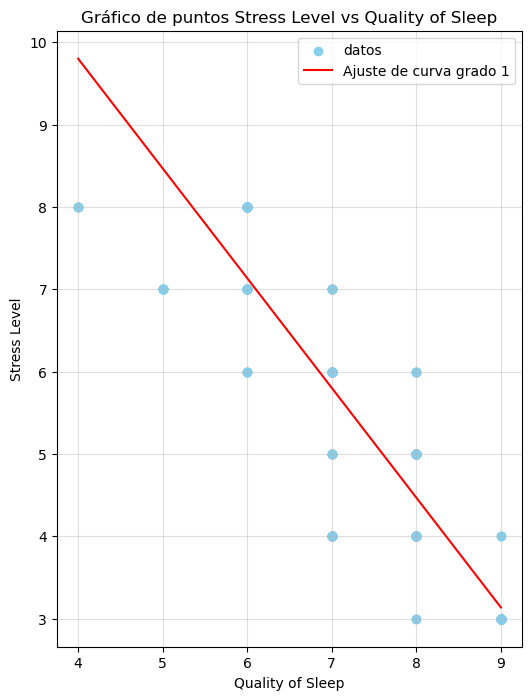

In [14]:
X=data['Quality of Sleep'].to_numpy()
Y=data['Stress Level'].to_numpy()
Coef_Stress_Sleep = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_Stress_Sleep[0] + Coef_Stress_Sleep[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Level')
plt.title('Gráfico de puntos Stress Level vs Quality of Sleep')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()

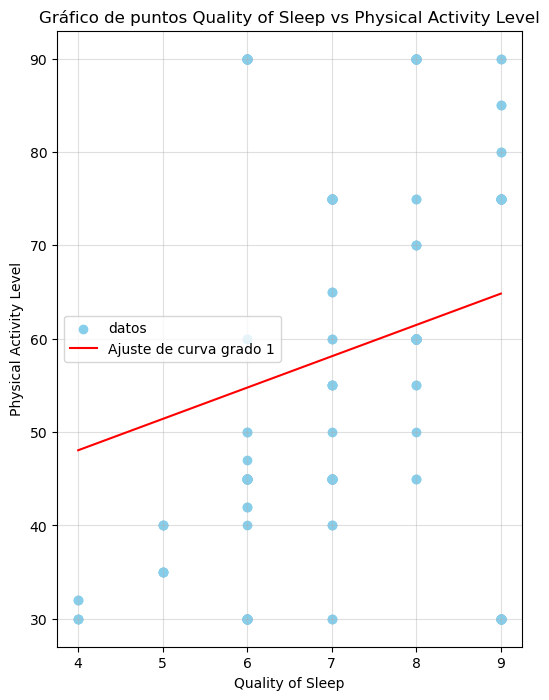

In [22]:
Y=data['Physical Activity Level'].to_numpy()
X=data['Quality of Sleep'].to_numpy()
Coef_Stress_Sleep = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_Stress_Sleep[0] + Coef_Stress_Sleep[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.ylabel('Physical Activity Level')
plt.xlabel('Quality of Sleep')
plt.title('Gráfico de puntos Quality of Sleep vs Physical Activity Level')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()

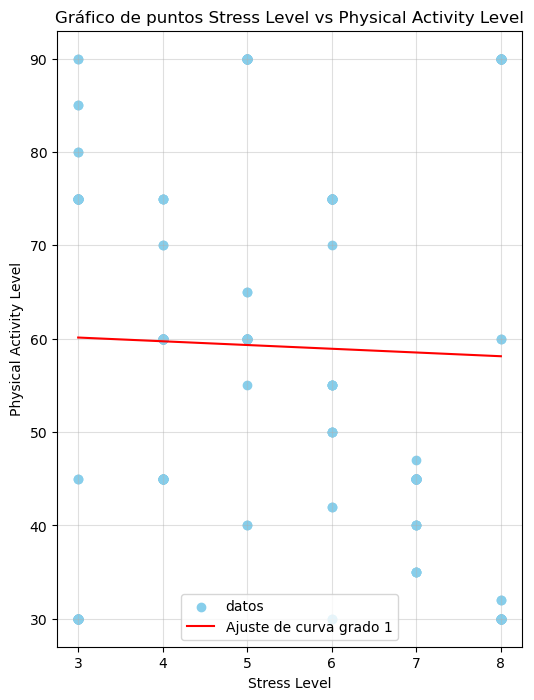

In [23]:
Y=data['Physical Activity Level'].to_numpy()
X=data['Stress Level'].to_numpy()
Coef_Stress_Sleep = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_Stress_Sleep[0] + Coef_Stress_Sleep[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.ylabel('Physical Activity Level')
plt.xlabel('Stress Level')
plt.title('Gráfico de puntos Stress Level vs Physical Activity Level')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()

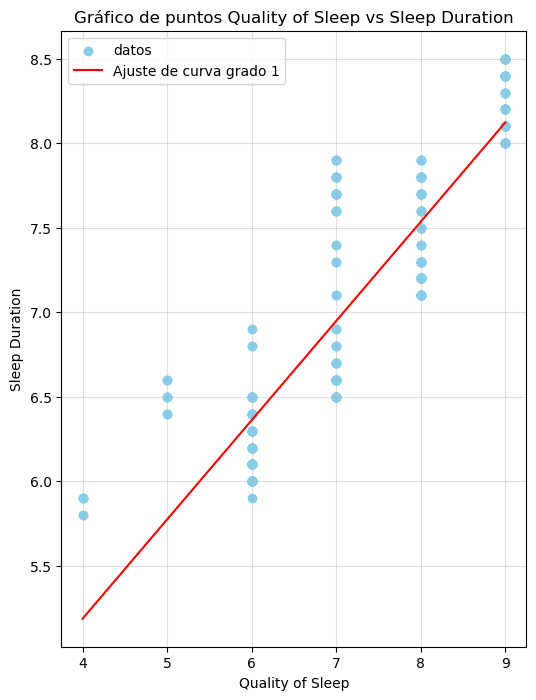

In [24]:
Y=data['Sleep Duration'].to_numpy()
X=data['Quality of Sleep'].to_numpy()
Coef_Stress_Sleep = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_Stress_Sleep[0] + Coef_Stress_Sleep[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.ylabel('Sleep Duration')
plt.xlabel('Quality of Sleep')
plt.title('Gráfico de puntos Quality of Sleep vs Sleep Duration')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()

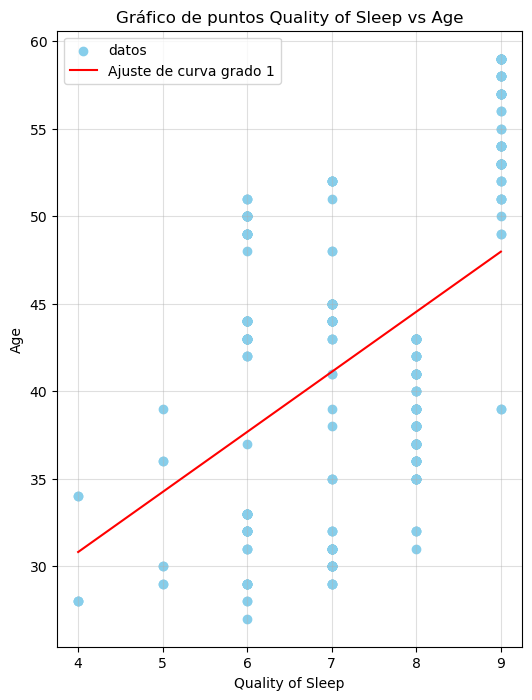

In [25]:
Y=data['Age'].to_numpy()
X=data['Quality of Sleep'].to_numpy()
Coef_Stress_Sleep = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_Stress_Sleep[0] + Coef_Stress_Sleep[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.ylabel('Age')
plt.xlabel('Quality of Sleep')
plt.title('Gráfico de puntos Quality of Sleep vs Age')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()

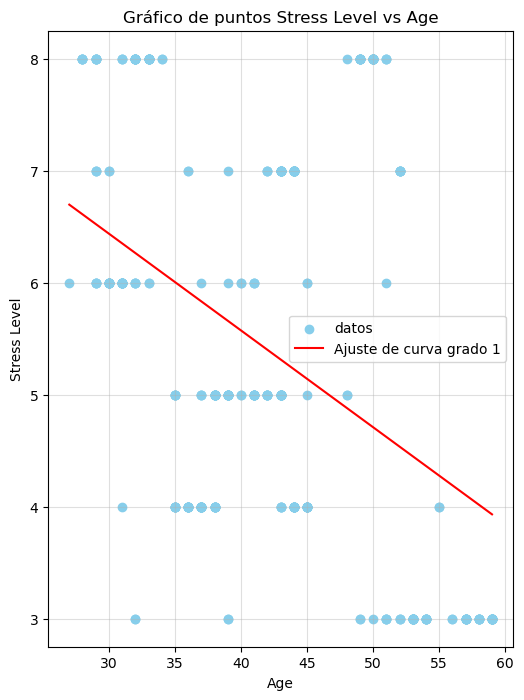

In [17]:
X=data['Age'].to_numpy()
Y=data['Stress Level'].to_numpy()
Coef_Ed_Estr = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
X = data['Age'].to_numpy().reshape(-1, 1)
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_Ed_Estr[0] + Coef_Ed_Estr[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.title('Gráfico de puntos Stress Level vs Age')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()


Exploración de datos. Gráfico de distribuciones.

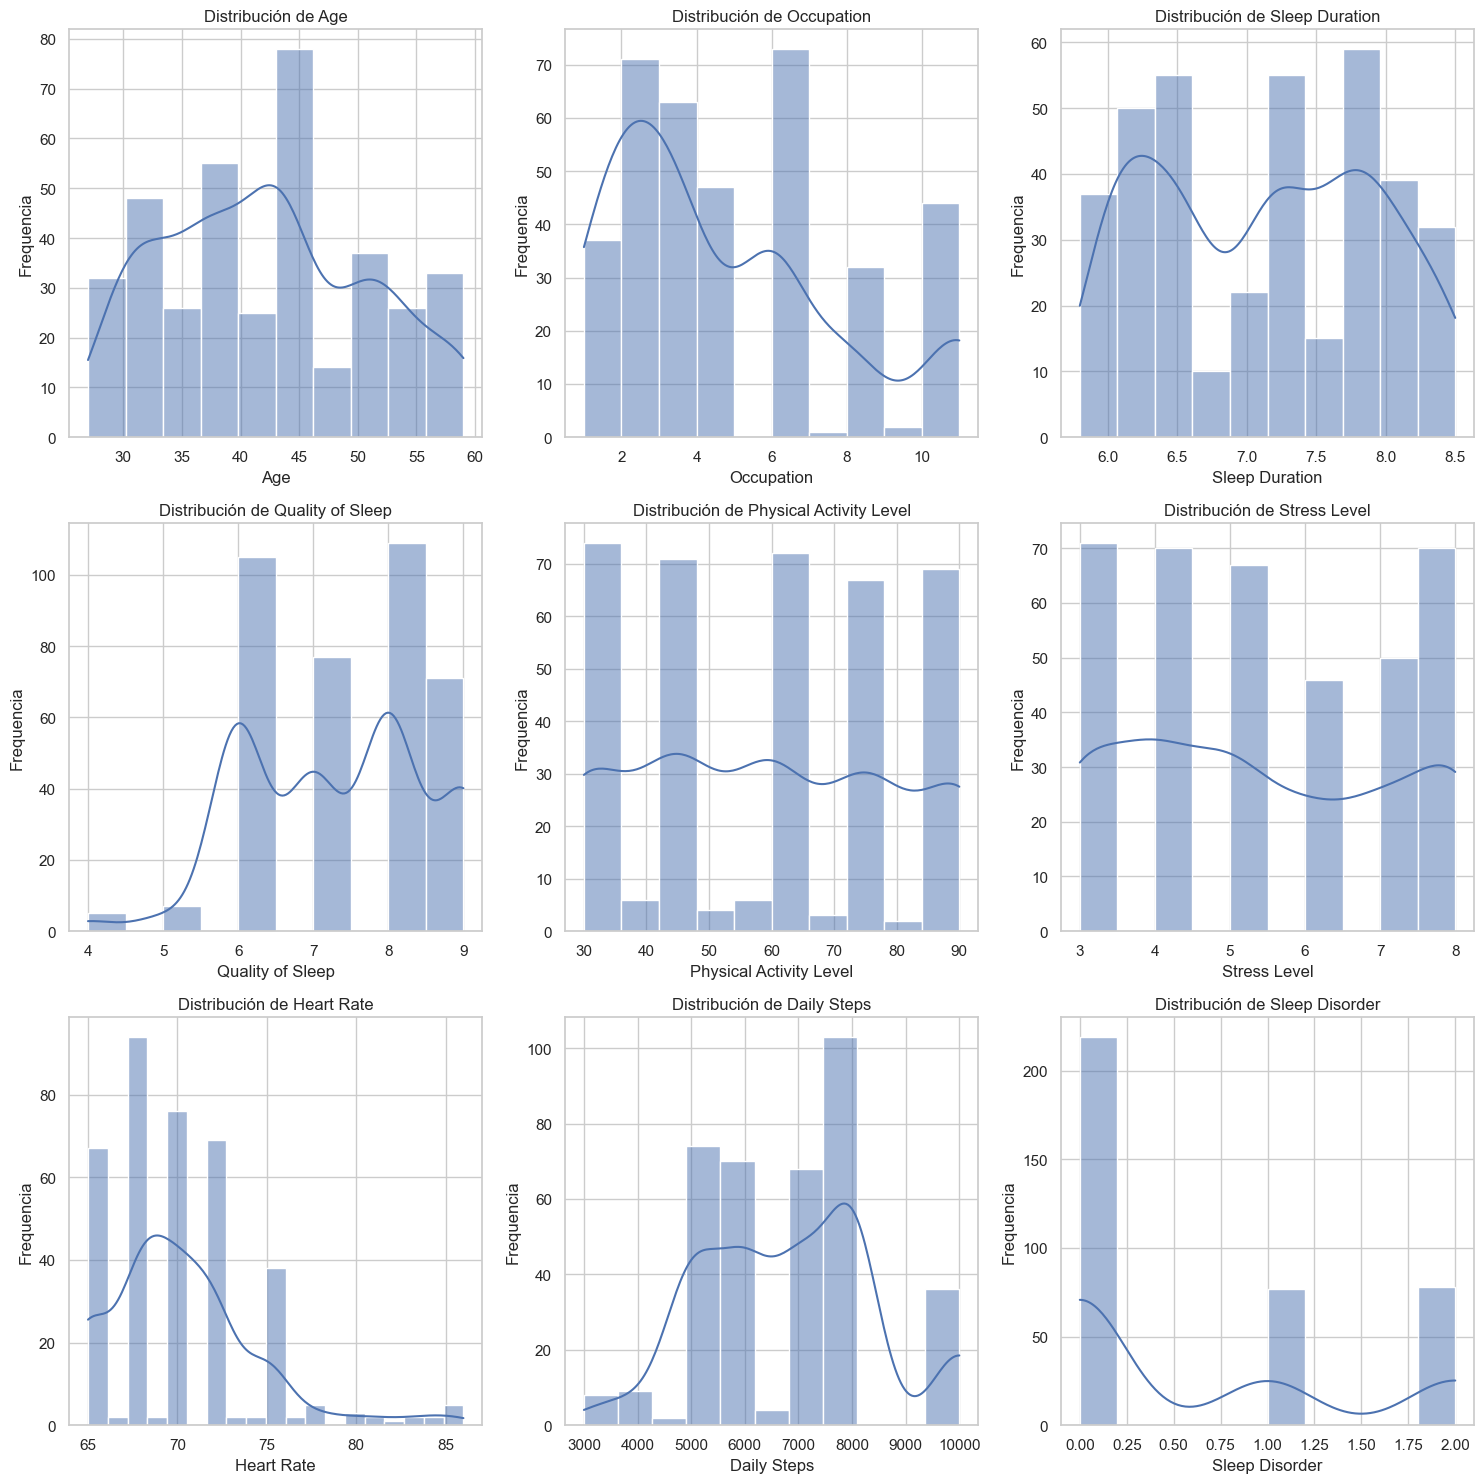

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
sns.set(style="whitegrid")

# Select relevant columns for univariate analysis
columns_of_interest = [
    'Age','Occupation','Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
    'Stress Level', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']

# Plot histograms for each selected column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(columns_of_interest):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequencia')

plt.tight_layout()
plt.show()

Graficos variables

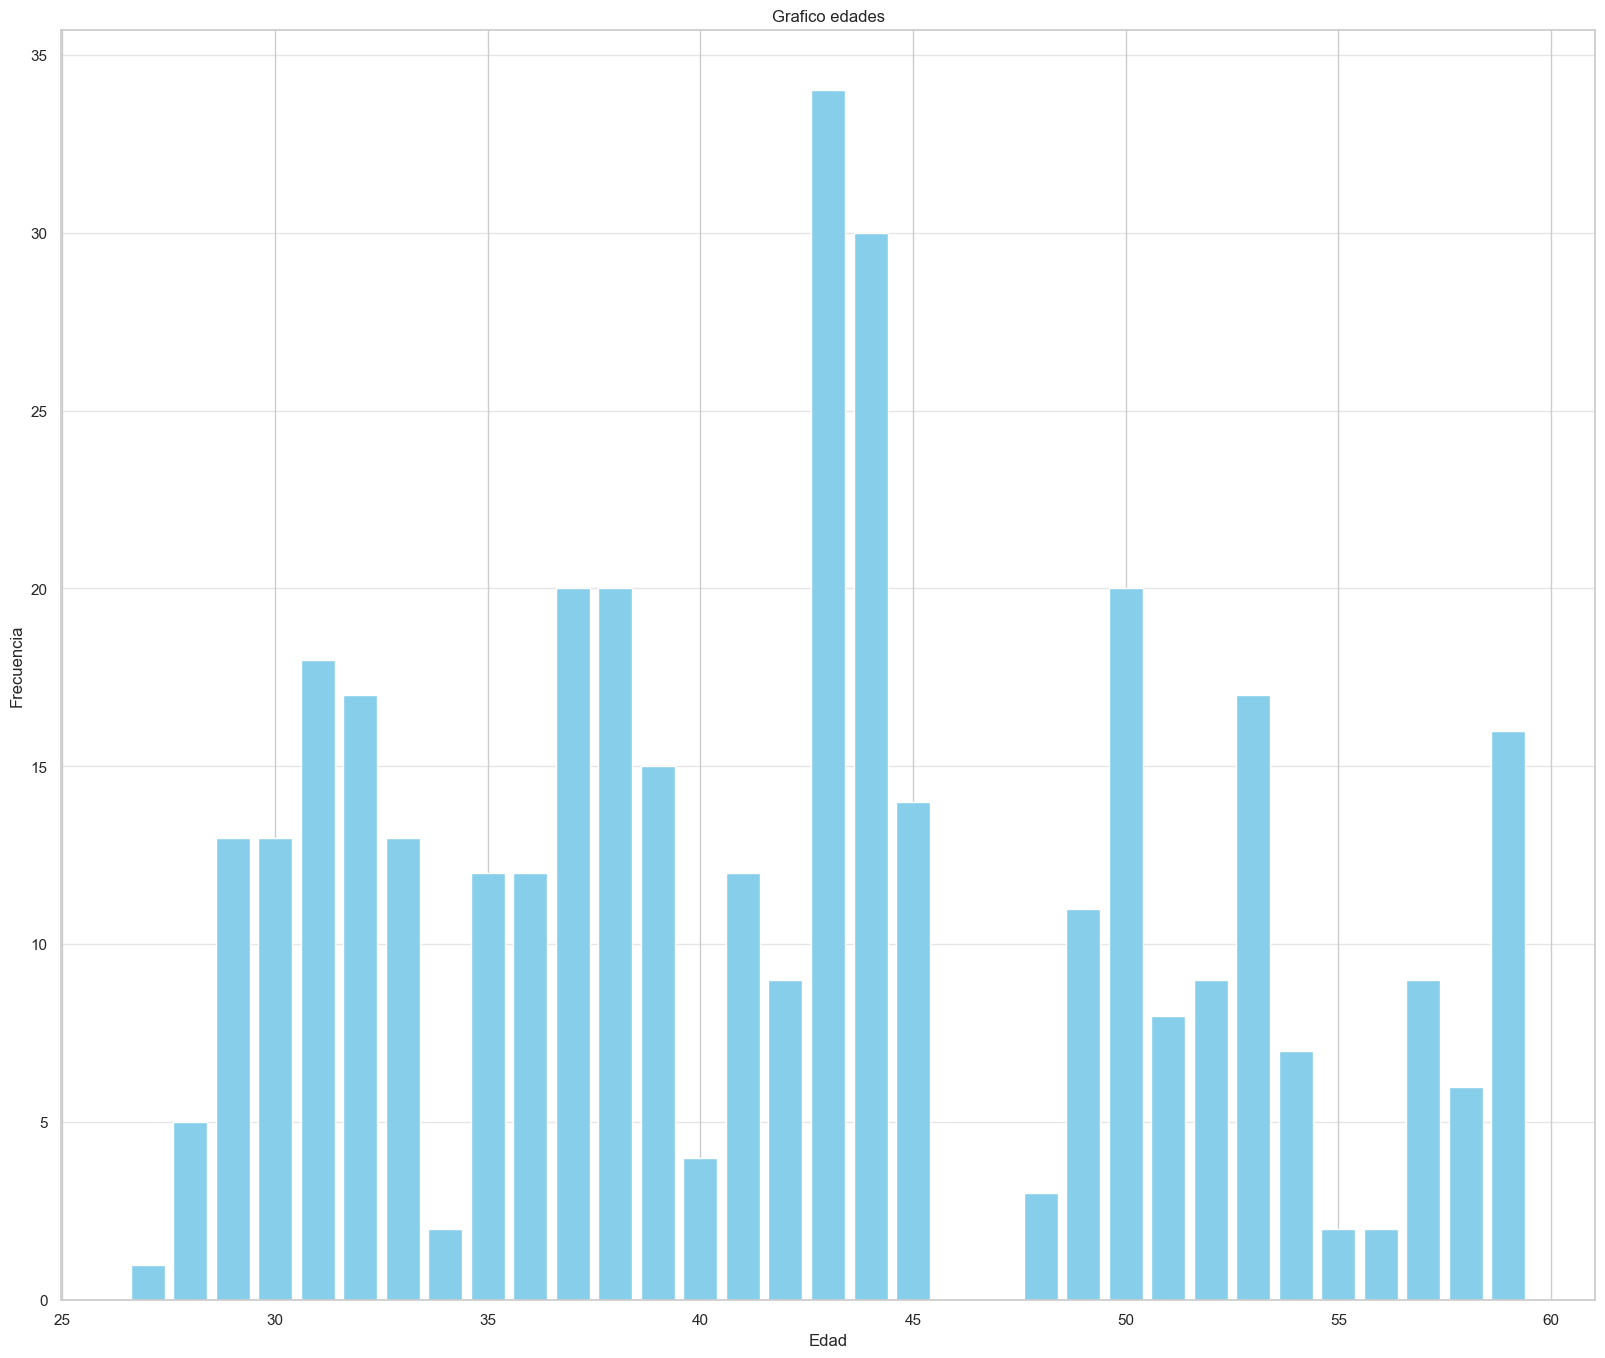

In [27]:
edades=data['Age'].value_counts()
sns.histplot(data[edades], kde=True, ax=axes)
plt.bar(edades.index, edades.values, color='skyblue', alpha=1)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Grafico edades')
plt.grid(axis='y', alpha=0.5) 
plt.show()




<Axes: >

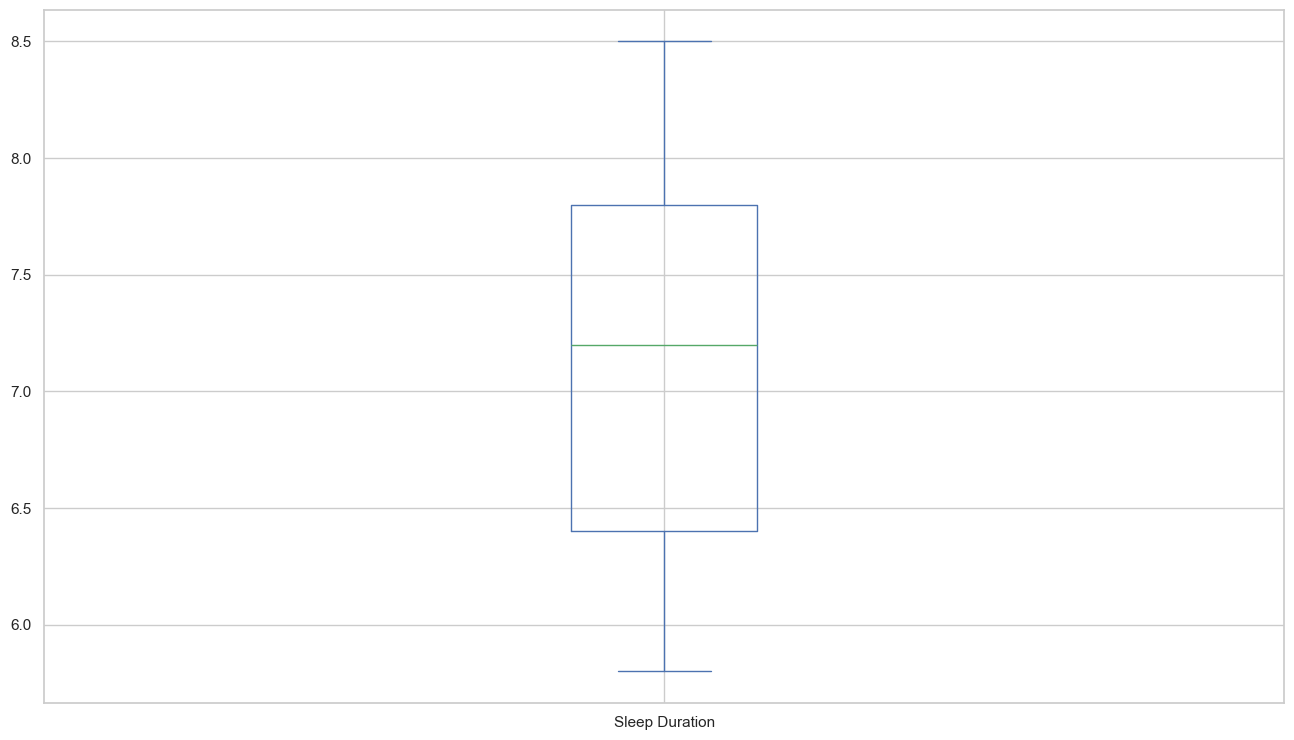

In [36]:
tiempo_de_dormir=data['Sleep Duration']
tiempo_de_dormir.plot(kind='box',figsize=(16,9),grid=True)

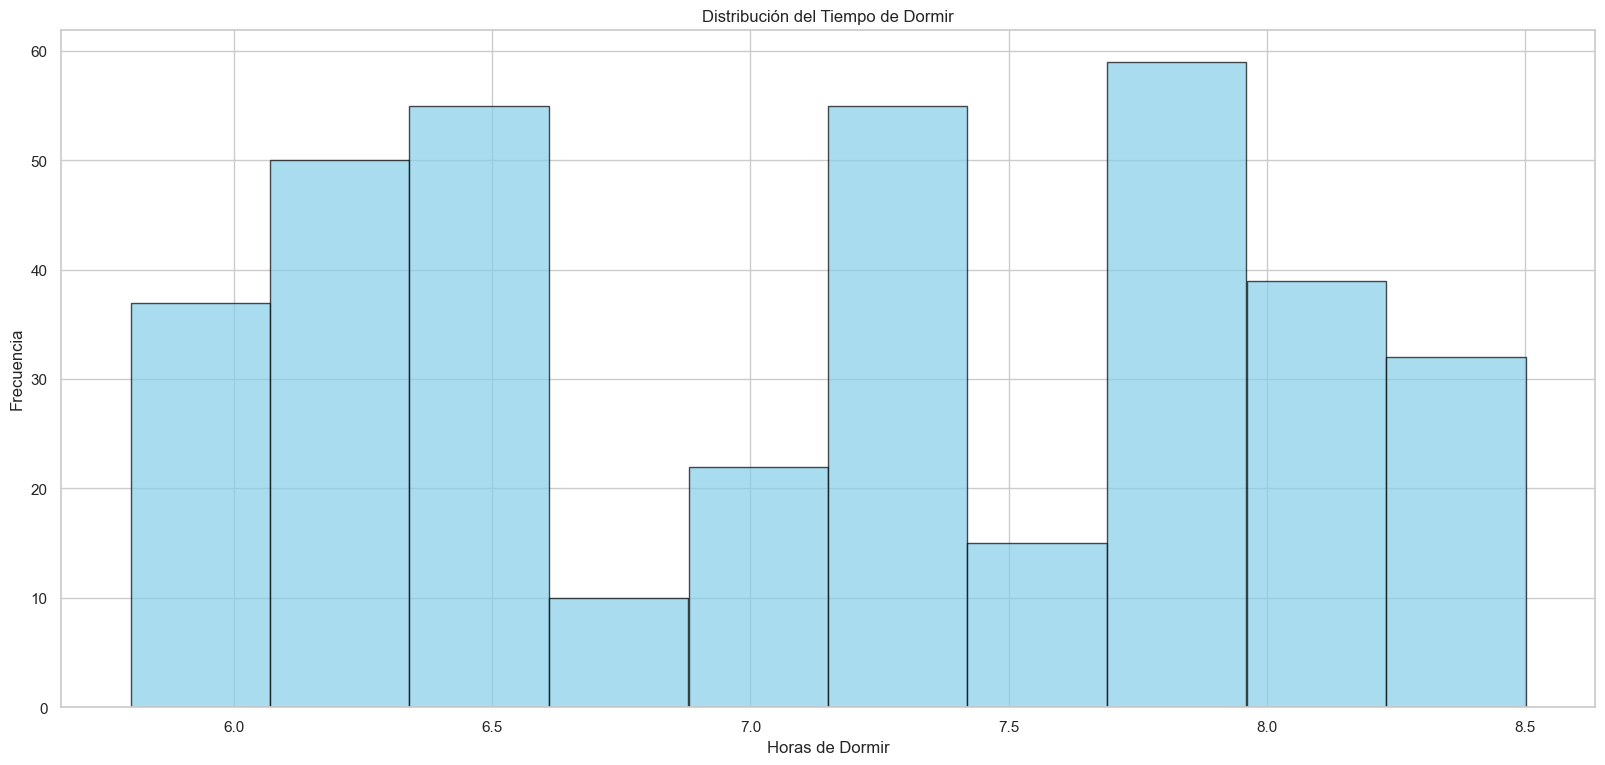

In [37]:

plt.hist(tiempo_de_dormir, bins='auto', color='skyblue', alpha=0.7, edgecolor='black')

plt.title('Distribución del Tiempo de Dormir')
plt.xlabel('Horas de Dormir')
plt.ylabel('Frecuencia')

plt.show()

Occupation
5     73
2     71
6     63
9     47
4     40
7     37
10    32
1      4
8      4
3      2
11     1
Name: count, dtype: int64

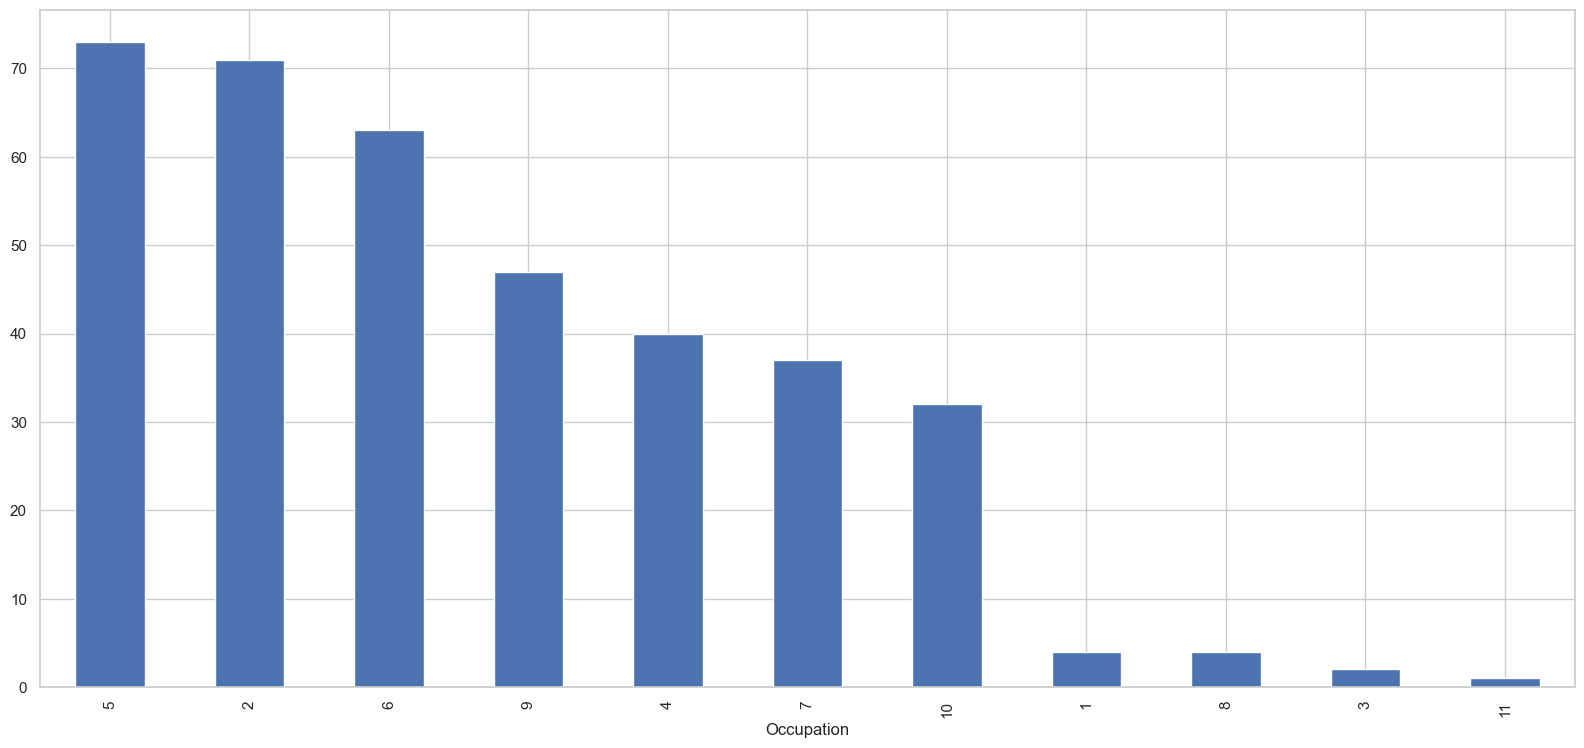

In [38]:
profesiones_count=data["Occupation"].value_counts()
profesiones_count.plot(kind="bar")
profesiones_count

<Axes: xlabel='BMI Category'>

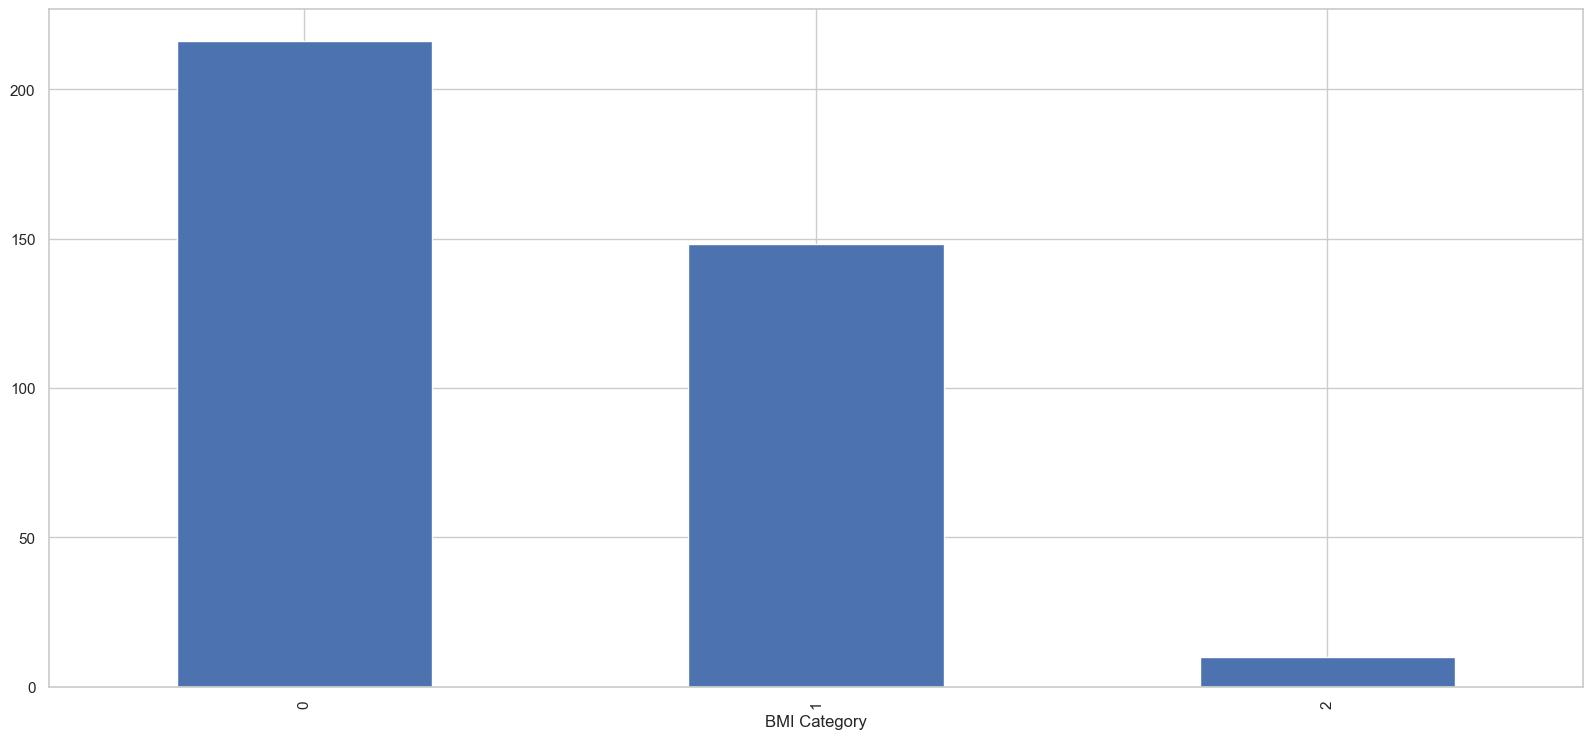

In [39]:
age_count=data["BMI Category"].value_counts()
age_count.plot(kind="bar")


<Axes: xlabel='Gender'>

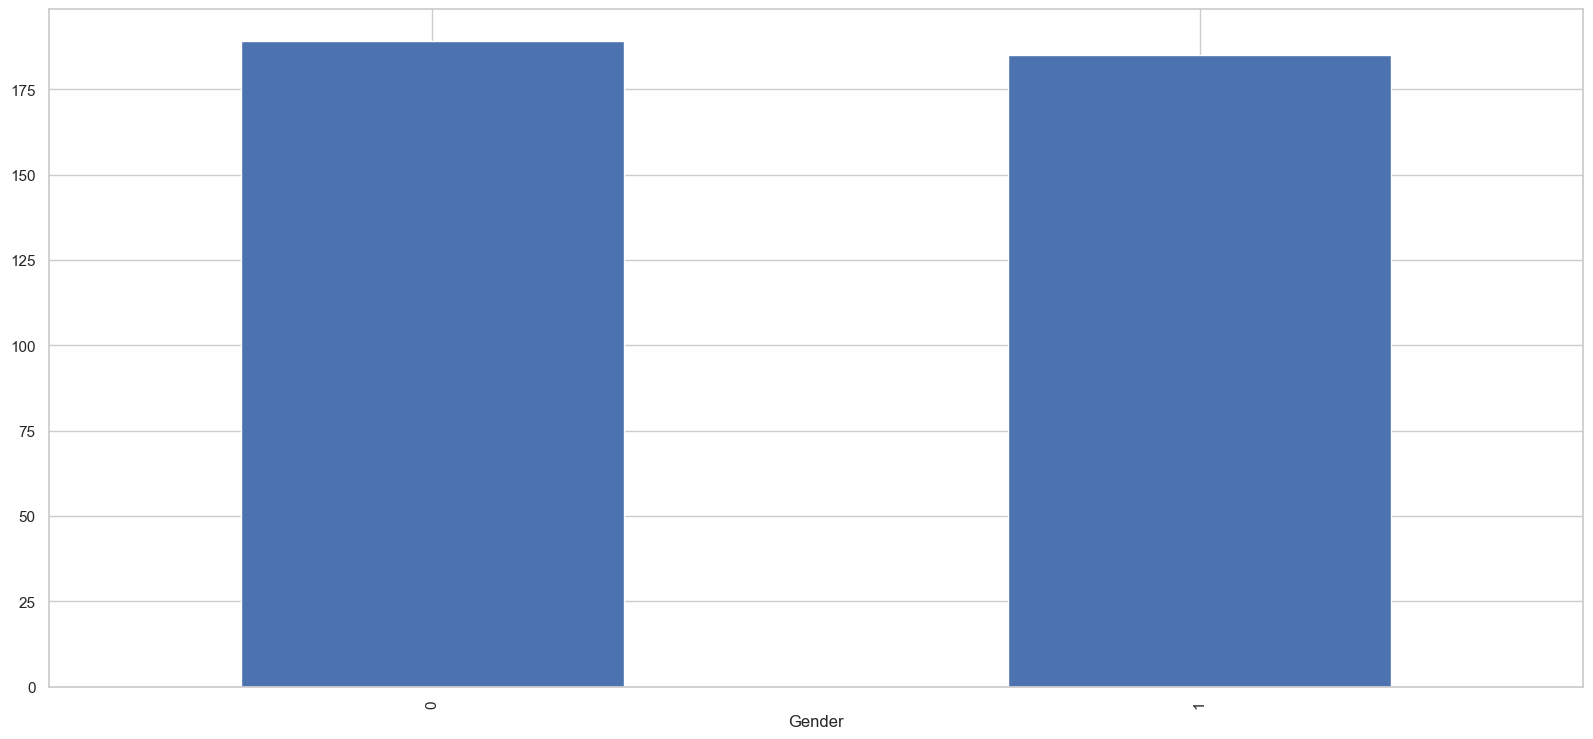

In [40]:
data_gender=data['Gender'].value_counts()
data_gender.plot(kind='bar')

<Axes: xlabel='Hours', ylabel='Frequency'>

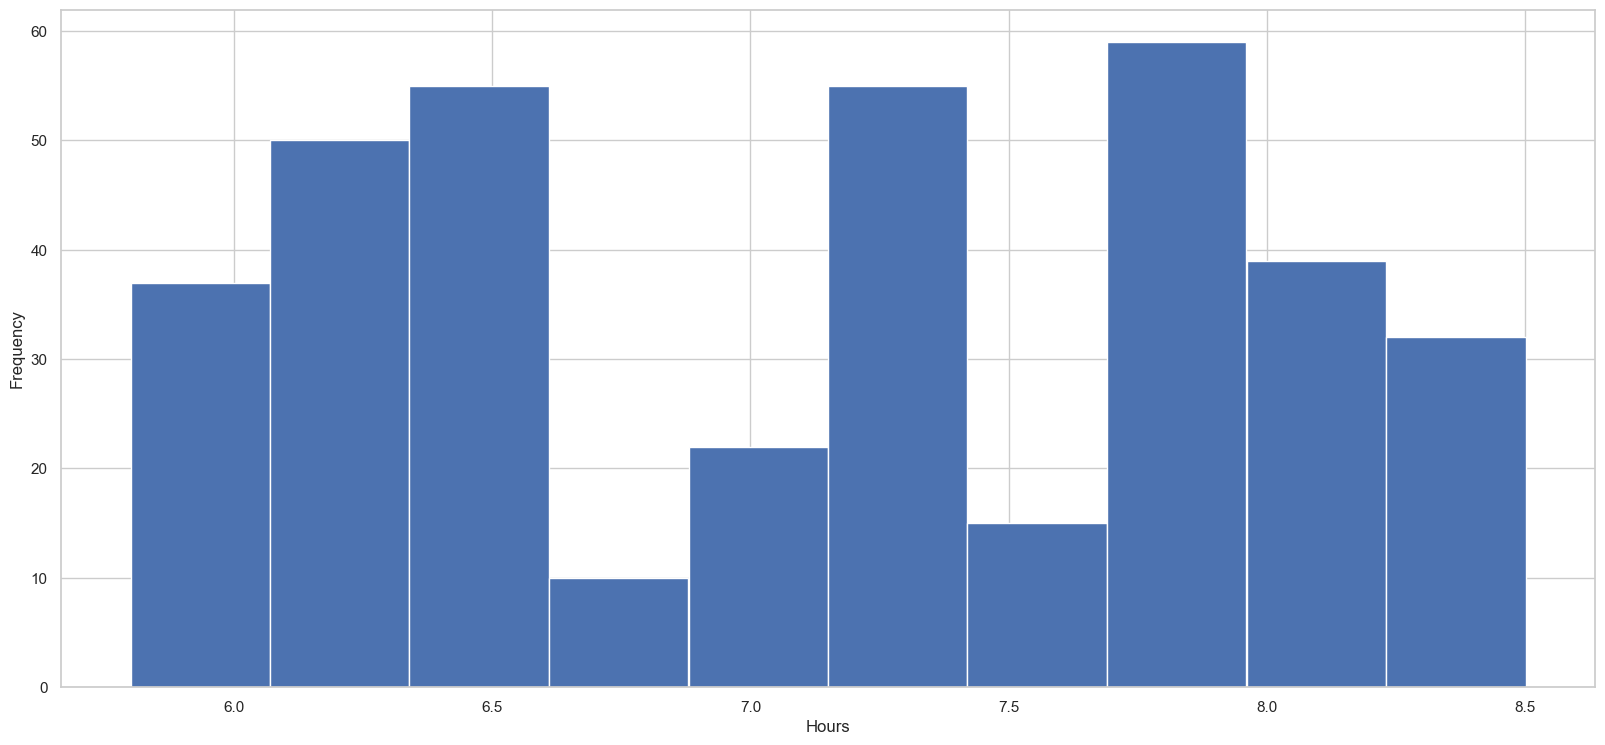

In [41]:
data["Sleep Duration"].plot(kind="hist",xlabel="Hours")

<Axes: xlabel='Sleep Disorder'>

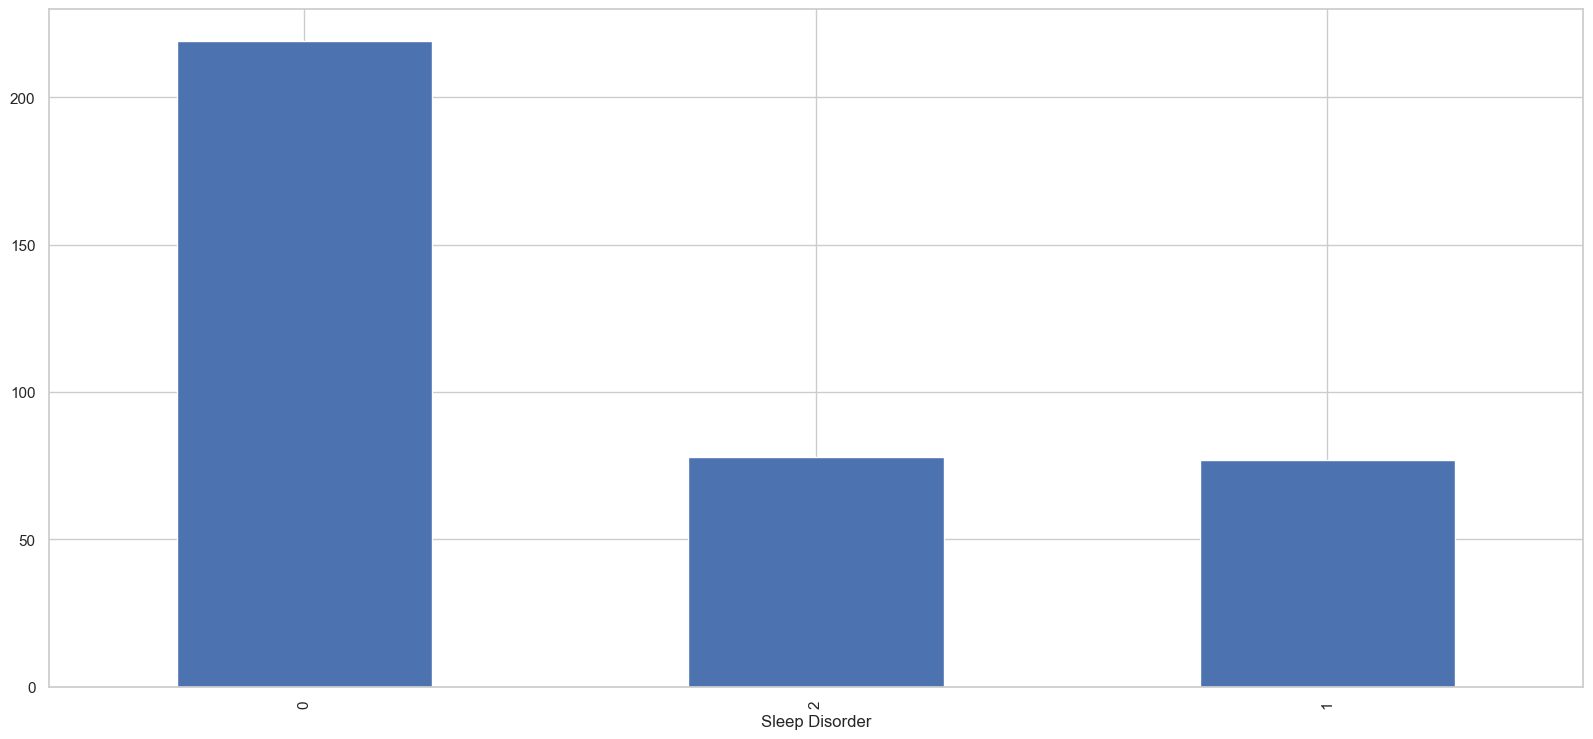

In [42]:
data['Sleep Disorder'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Frecuencia')

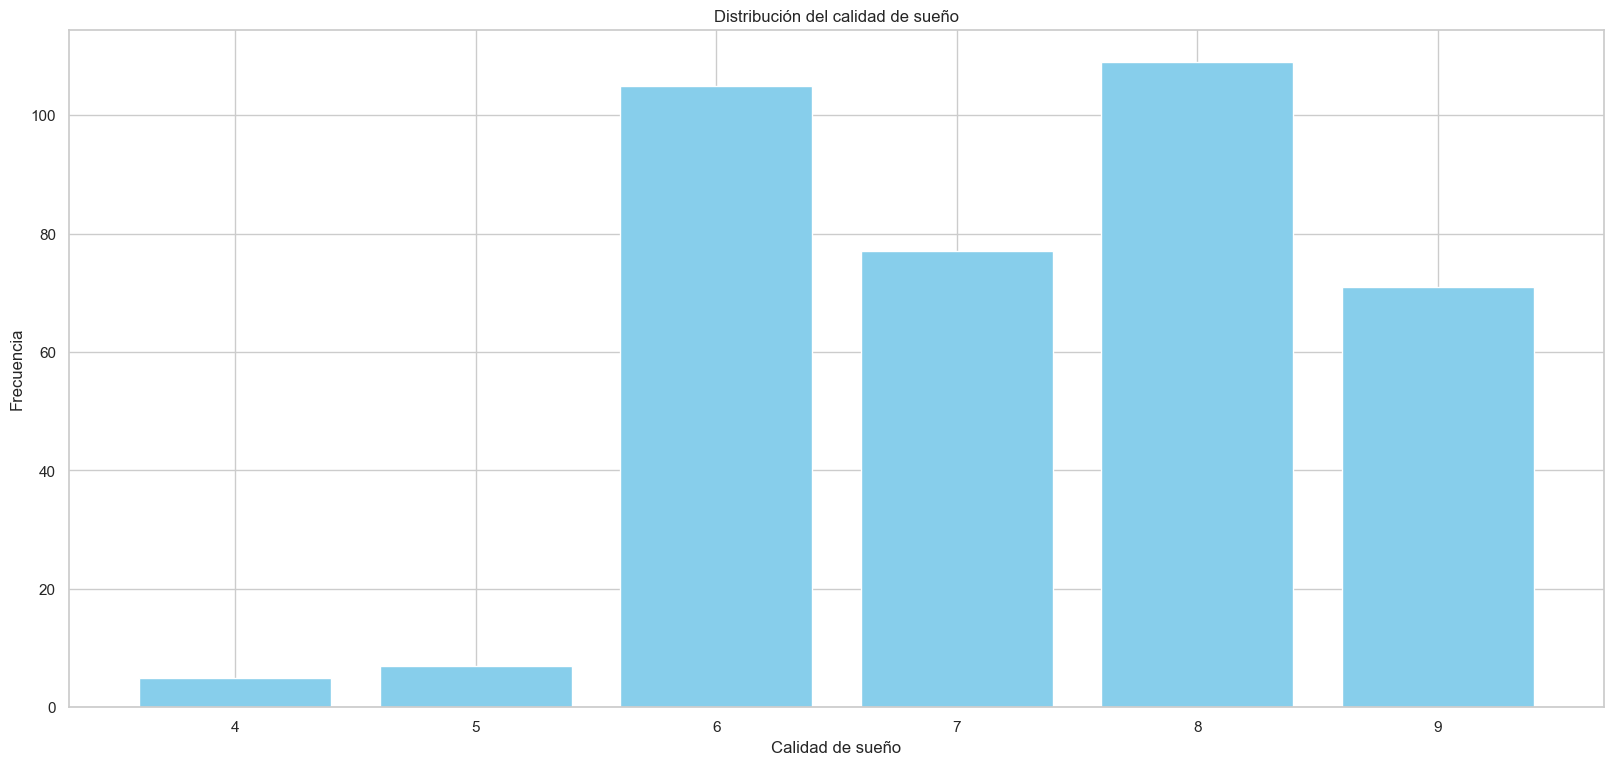

In [43]:
calidad_suenho=data["Quality of Sleep"].value_counts()

plt.bar(calidad_suenho.index,calidad_suenho.values,color='skyblue', alpha=1)

plt.title('Distribución del calidad de sueño')
plt.xlabel('Calidad de sueño')
plt.ylabel('Frecuencia')


<Axes: xlabel='systolic/diastolic'>

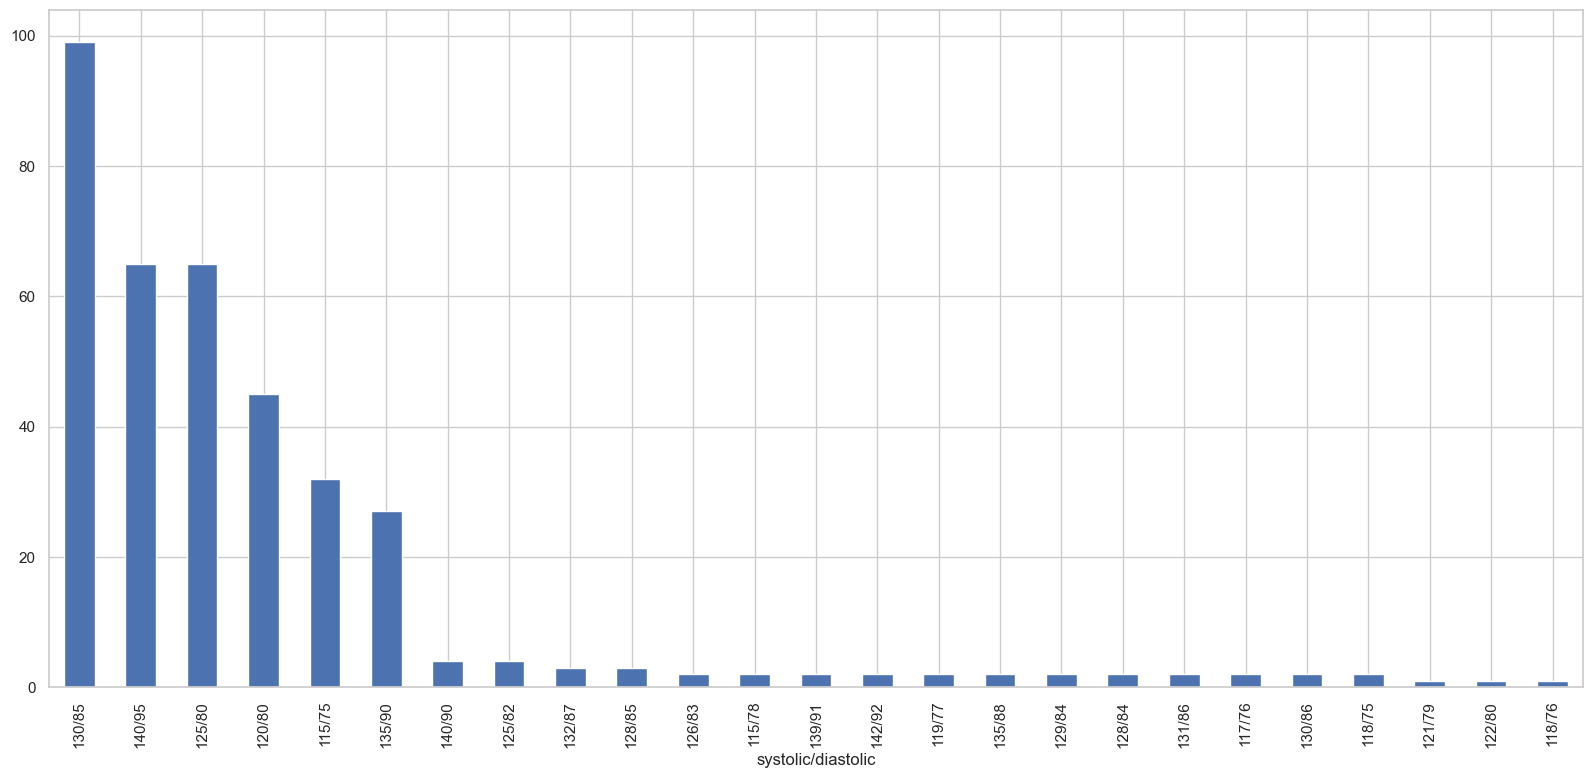

In [44]:
data["Blood Pressure"].value_counts().plot(kind="bar",xlabel="systolic/diastolic")

<Axes: xlabel='BPM', ylabel='Frequency'>

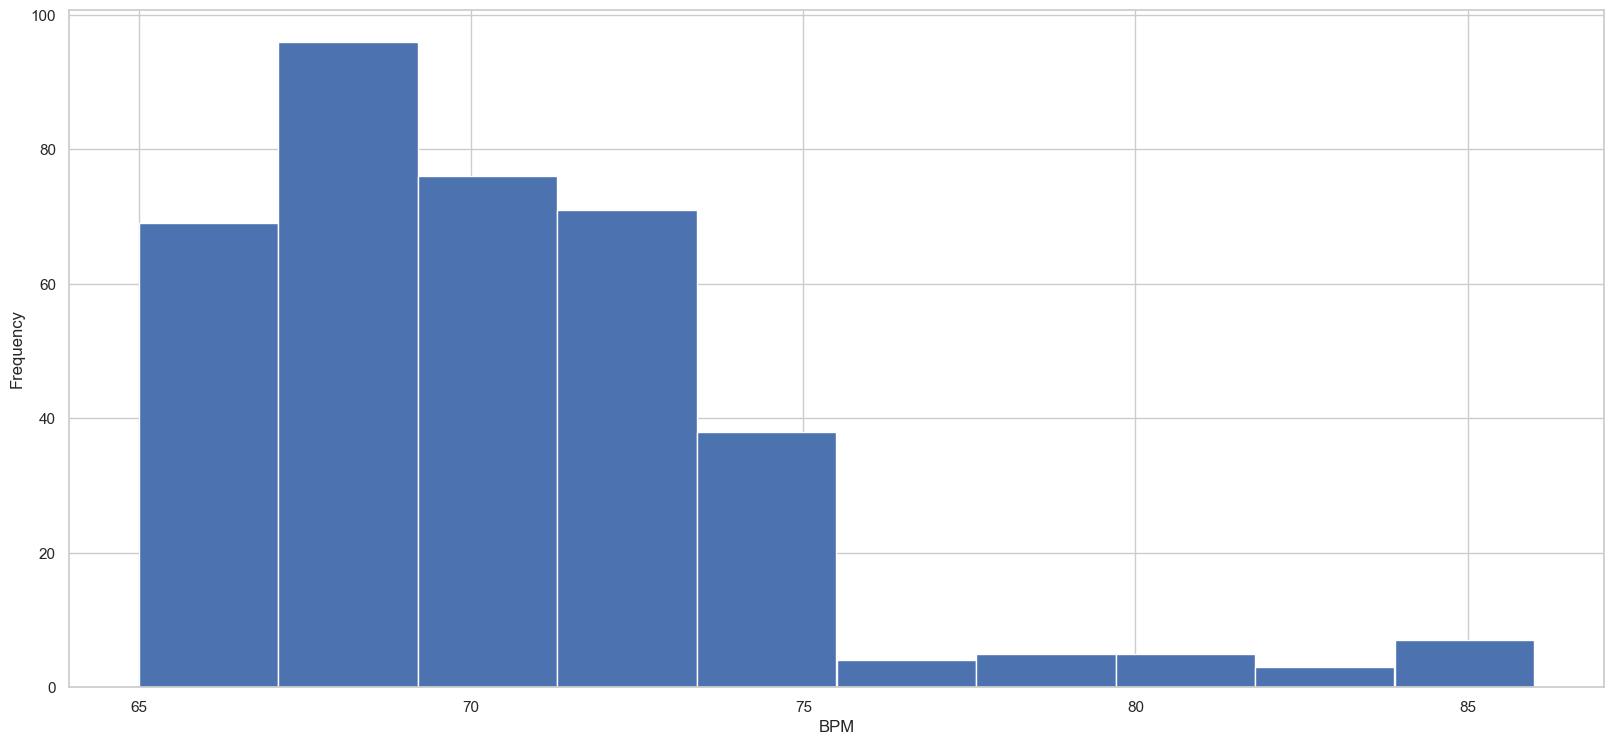

In [45]:
data["Heart Rate"].plot(kind="hist",xlabel="BPM")

Text(0, 0.5, 'Frecuencia')

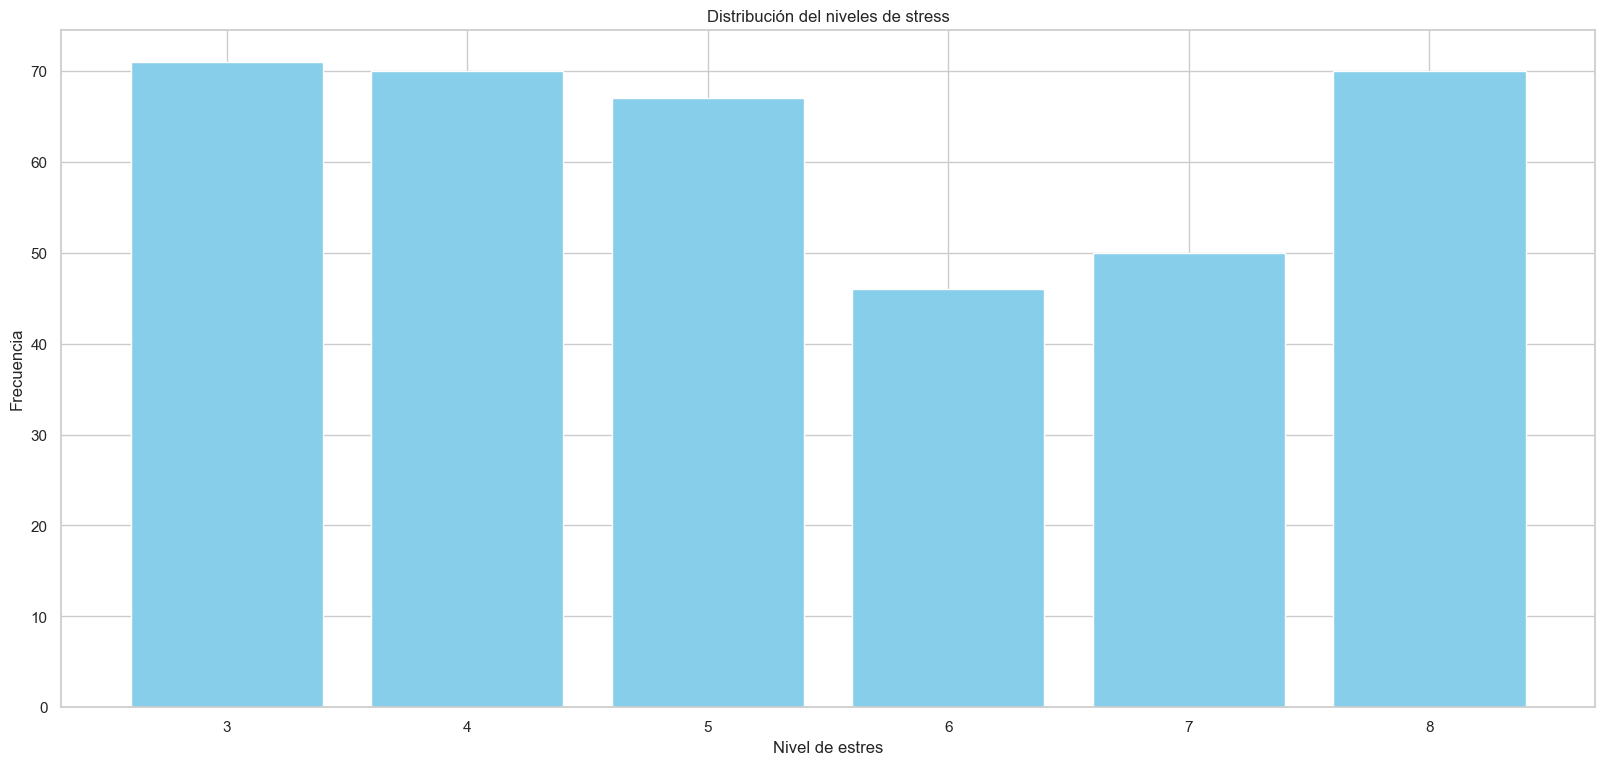

In [46]:
stress_level=data["Stress Level"].value_counts()
plt.bar(stress_level.index,stress_level.values,color='skyblue', alpha=1)

plt.title('Distribución del niveles de stress')
plt.xlabel('Nivel de estres')
plt.ylabel('Frecuencia')


<Axes: xlabel='min'>

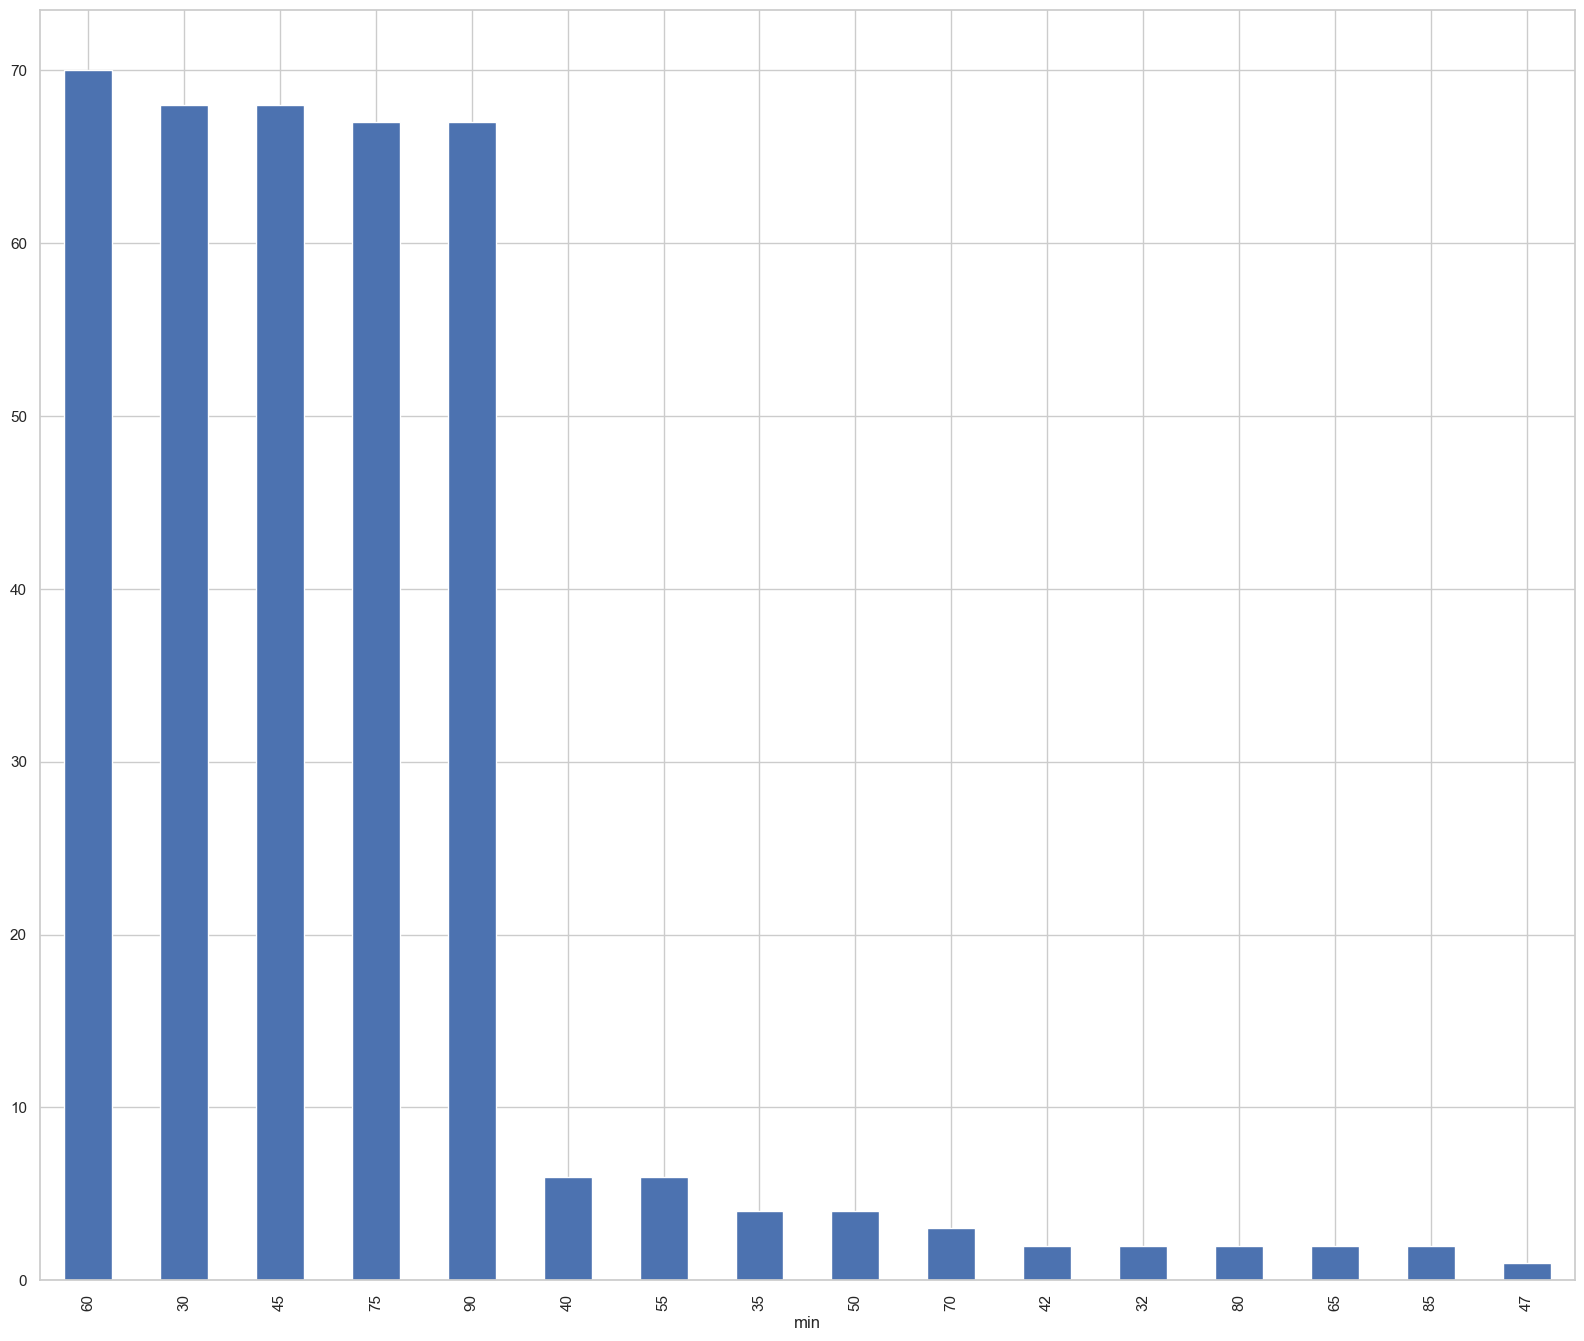

In [46]:
data["Physical Activity Level"].value_counts().plot(kind="bar",xlabel="min")


# **Prueba de Hipótesis**

---

## **Introducción**

Se analizarán dos grupos distintos:

- **Grupo 1:** Personas que no poseen ningún desorden del sueño.
- **Grupo 2:** Personas que sí poseen desórdenes del sueño.

El objetivo es probar si el tener desórdenes del sueño genera una diferencia en los tiempos de sueño entre los dos grupos, se probara con un 95% de confiabilidad.

---

## **Hipótesis**

### **I. Varianza**

- **H0 (Hipótesis Nula):**  
  No hay una diferencia significativa entre la varianza de los tiempos de dormir de ambos grupos.

- **H1 (Hipótesis Alternativa):**  
  Hay una diferencia significativa entre la varianza de los tiempos de dormir de ambos grupos.

### **II. Media**

- **H0 (Hipótesis Nula):**  
  No hay una diferencia significativa entre los promedios de los tiempos de dormir de ambos grupos.

- **H1 (Hipótesis Alternativa):**  
  Hay una diferencia significativa entre los promedios de los tiempos de dormir de ambos grupos.

---




In [42]:
sleep_disorder = data[(data["Sleep Disorder"] == 1) | (data["Sleep Disorder"] == 2)]
without_disorder=data[(data["Sleep Disorder"] == 0)]
without_disorder.describe()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
count,219.000000,219.000000,219.000000,216.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.0
mean,146.972603,0.374429,39.036530,3.208333,7.358447,7.625571,57.949772,5.114155,0.086758,69.018265,6852.968037,0.0
std,100.646895,0.485084,7.827764,2.196853,0.732320,0.975142,20.929814,1.591471,0.282125,2.657797,1393.473600,0.0
min,1.000000,0.000000,27.000000,1.000000,6.000000,6.000000,30.000000,3.000000,0.000000,65.000000,4200.000000,0.0
25%,65.500000,0.000000,32.000000,2.000000,7.100000,7.000000,30.000000,4.000000,0.000000,68.000000,5000.000000,0.0
50%,128.000000,0.000000,38.000000,3.000000,7.400000,8.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,0.0
75%,207.500000,1.000000,43.000000,4.000000,7.800000,8.000000,75.000000,6.000000,0.000000,70.000000,8000.000000,0.0
max,360.000000,1.000000,59.000000,11.000000,8.500000,9.000000,90.000000,8.000000,1.000000,77.000000,10000.000000,0.0


In [43]:
from scipy.stats import levene,ttest_ind
import math
result=levene(sleep_disorder["Sleep Duration"],without_disorder["Sleep Duration"])
result

LeveneResult(statistic=0.007505751507139209, pvalue=0.9310076687467913)

In [44]:
ttest_ind(sleep_disorder["Sleep Duration"],without_disorder["Sleep Duration"])

TtestResult(statistic=-6.9411728907765555, pvalue=1.7383790339837897e-11, df=372.0)

In [45]:
mean=without_disorder["Sleep Duration"].mean()
std=without_disorder["Sleep Duration"].std()
zvalue=2.57
interval=(mean-math.sqrt(std/219),mean+math.sqrt(std/219))
print(interval)
print(sleep_disorder["Sleep Duration"].mean())


(7.300620780083558, 7.416274197085394)
6.812258064516129


# **Resultados de Ambas Pruebas de Hipótesis**

---

## **I. Varianza**

- **Conclusión:**  
  No se rechaza la hipótesis nula.

- **Razón:**  
  El valor `p` es mayor que el nivel de significancia (`α`), lo que indica que no hay una diferencia significativa en la varianza de ambas muestras.

- **Detalles:**  
  `p-value = 0.9310` (mayor que `0.05`)

    ```markdown
    0.9310076687467913 > 0.05
    ```

---

## **II. Media**

- **Conclusión:**  
  Se rechaza la hipótesis nula.

- **Razón:**  
  El valor `p` es menor que el nivel de significancia (`α`), lo que indica que hay una diferencia significativa en la media de las muestras.

- **Detalles:**  
  `p-value = 1.7384e-11` (menor que `0.05`)

    ```markdown
    1.7383790339837897e-11 < 0.05
    ```

---

